In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score

In [7]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
df.shape

(1030, 9)

In [11]:
#Checking the value is not negative and zero
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [14]:
X= df.drop(columns='Strength', axis=1)
y =df['Strength']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [21]:
#Apply LR without transformation
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
np.round(r2_score(y_test, y_pred), 2)

np.float64(0.63)

In [22]:
#Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

np.float64(0.4609940491662864)

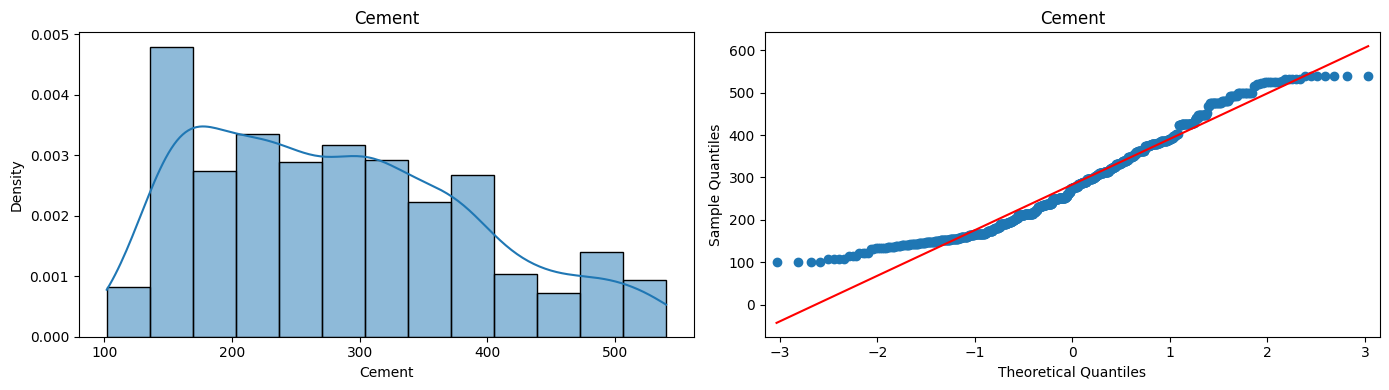

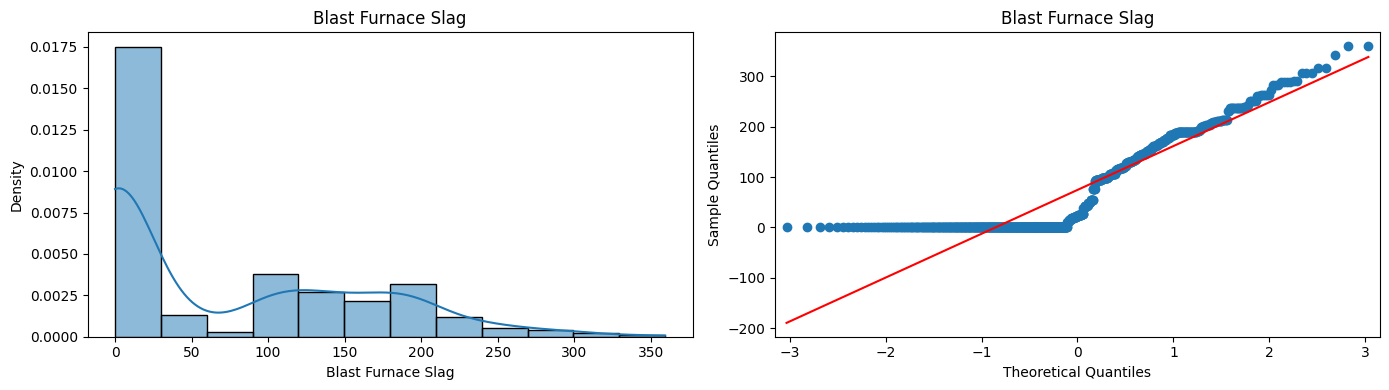

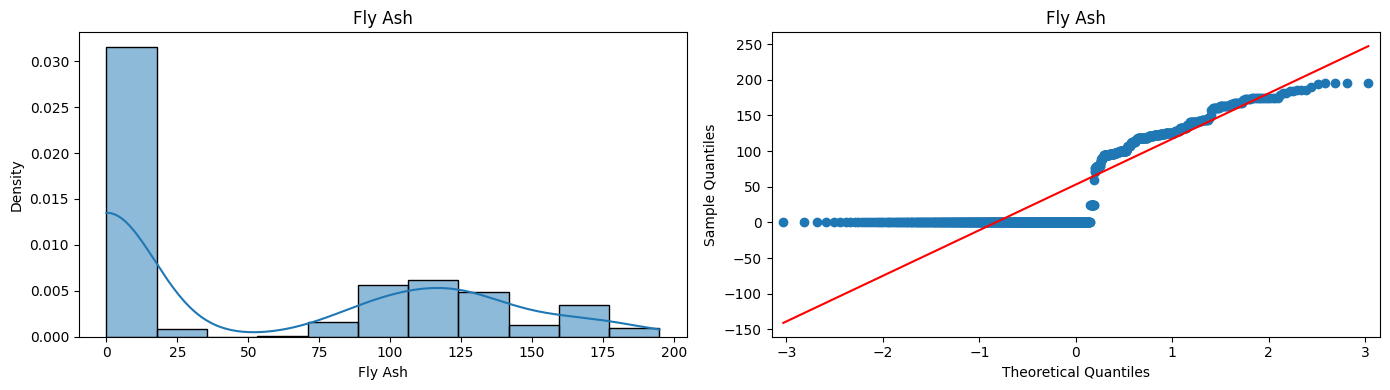

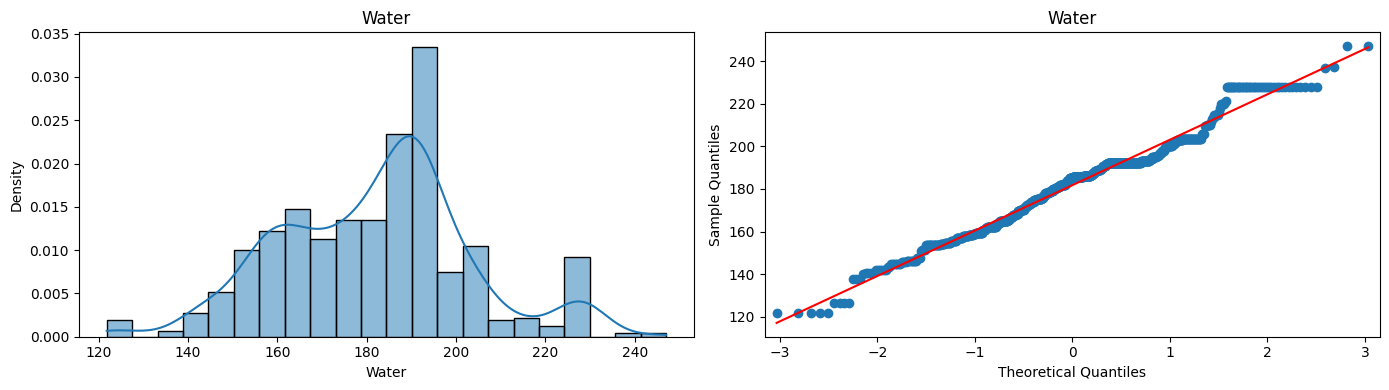

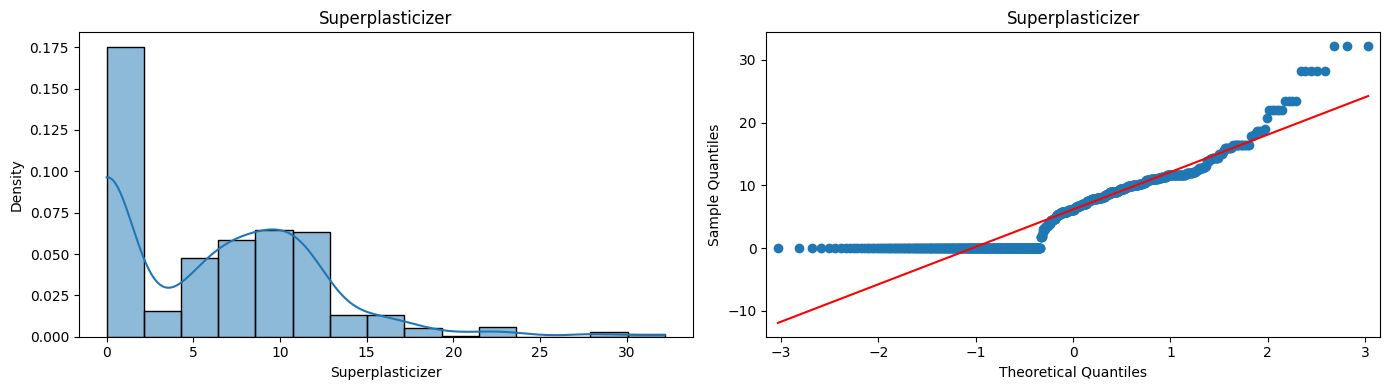

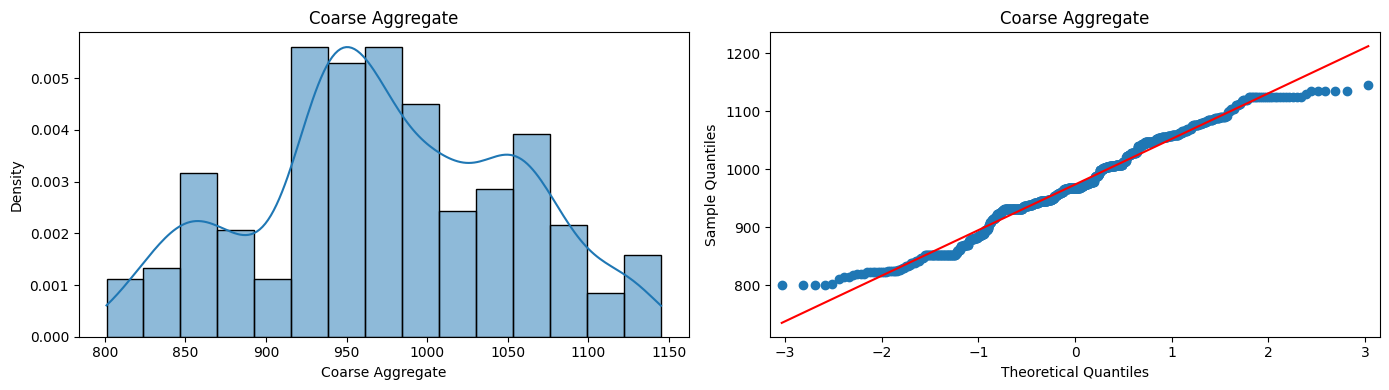

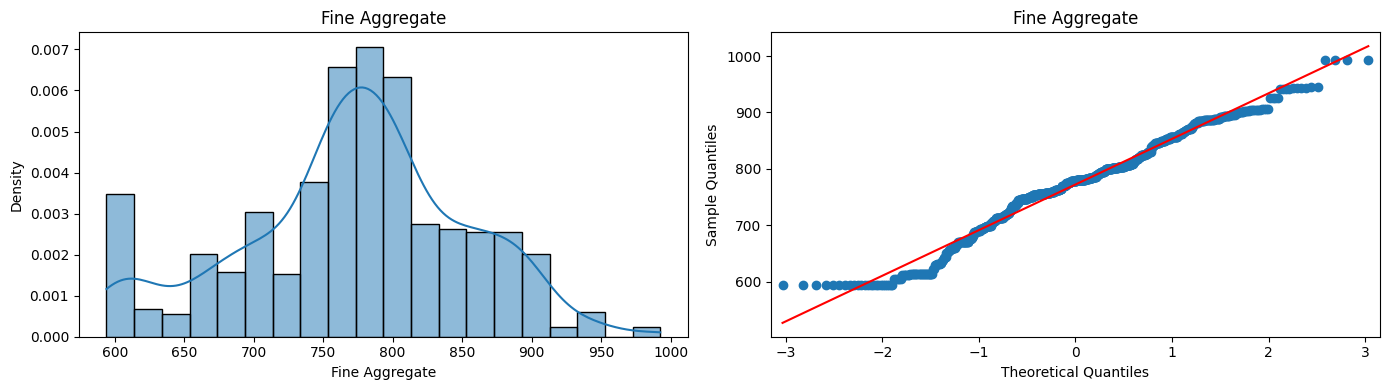

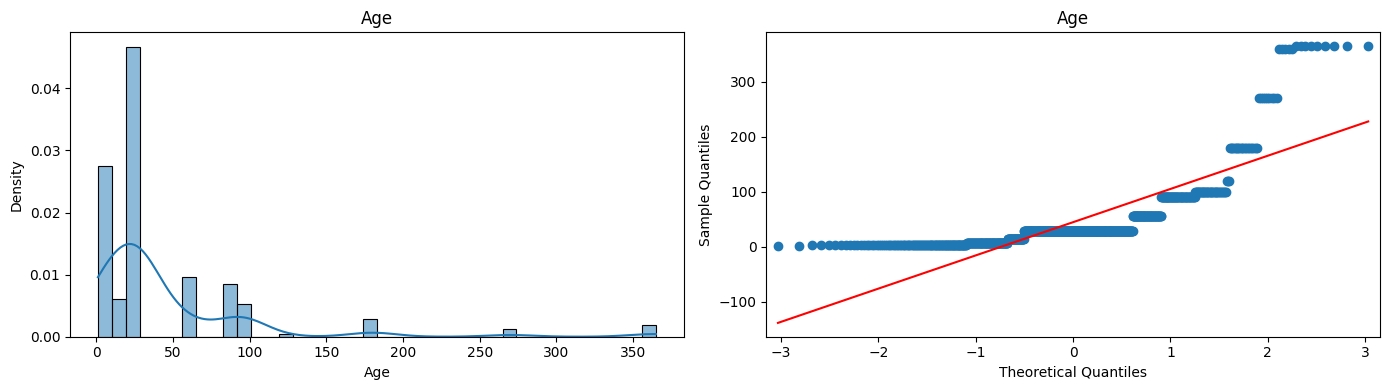

In [23]:
#Plotting the distplots without any transformation
for col in X_train.columns:
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))
    sns.histplot(X_train[col],kde=True, stat='density', ax=ax1)
    ax1.set_title(col)

    sm.qqplot(X_train[col].dropna(), line='s', ax=ax2)
    ax2.set_title(col)
    plt.tight_layout()
    plt.show()

In [31]:
#Applying box-cox transform, in power transformer, it is using standardization method internally for scaling
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [26]:
#Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred = lr.predict(X_test_transformed)
r2_score(y_test, y_pred)

0.8047825013722172

In [28]:
#Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.1)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y, scoring='r2' ))

np.float64(0.6737297875081018)

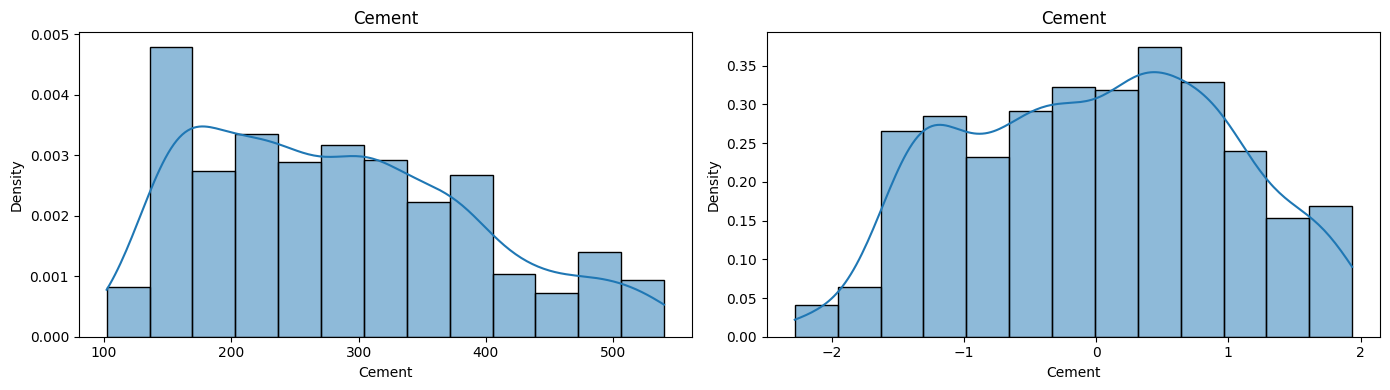

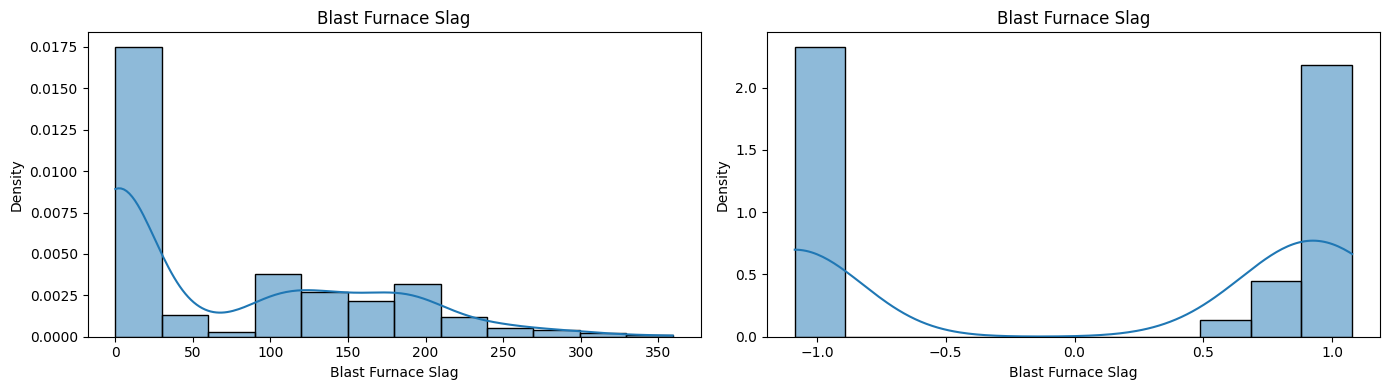

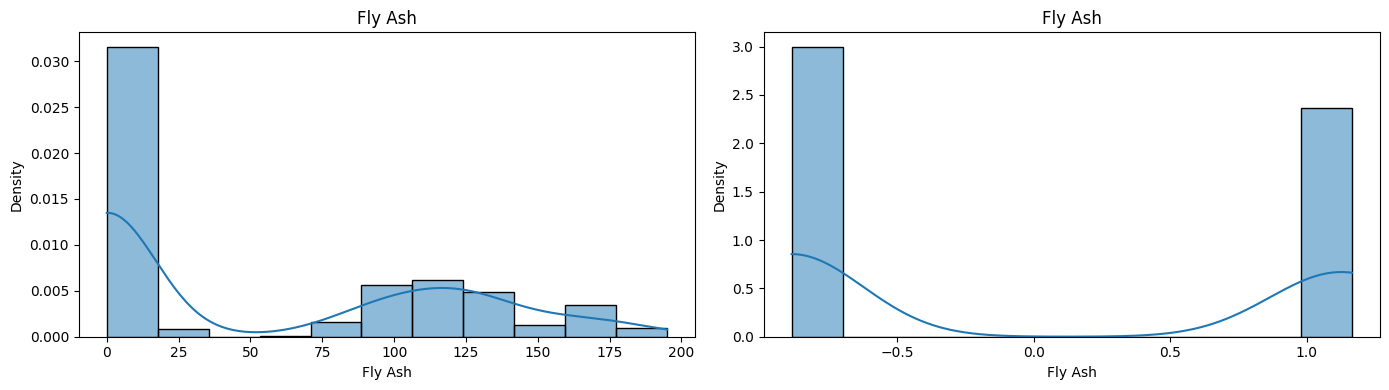

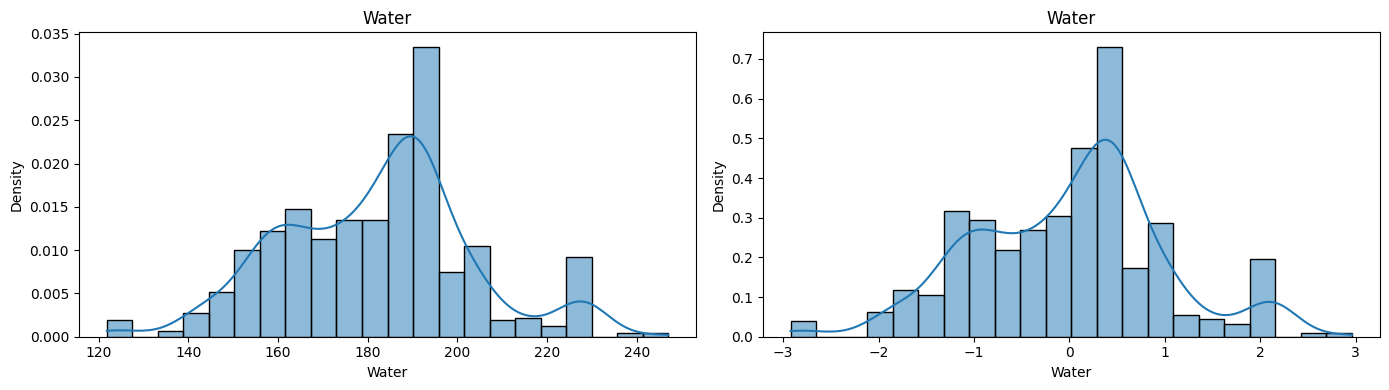

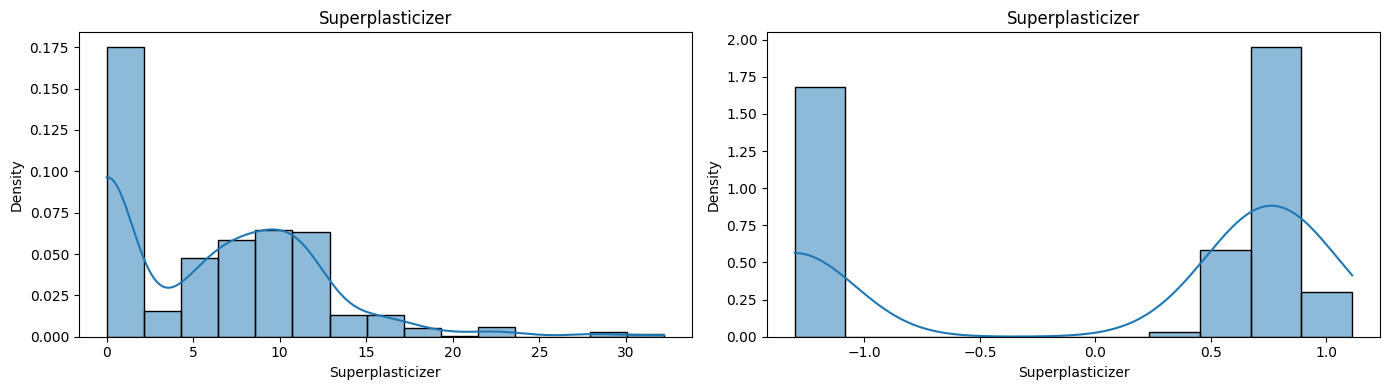

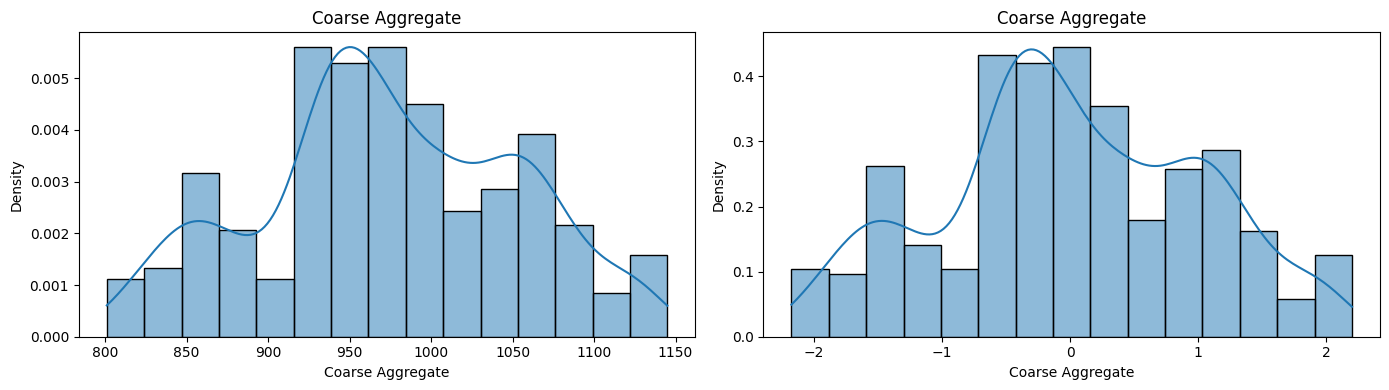

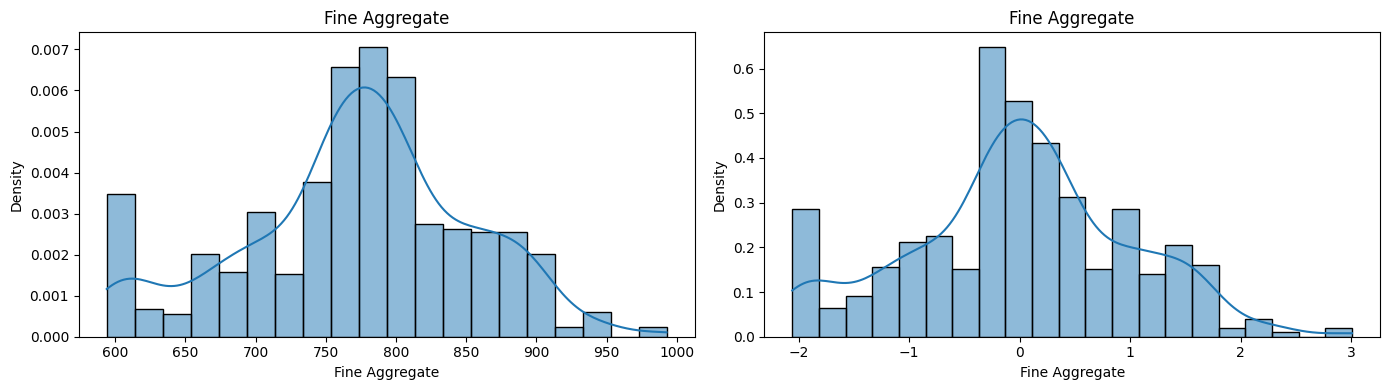

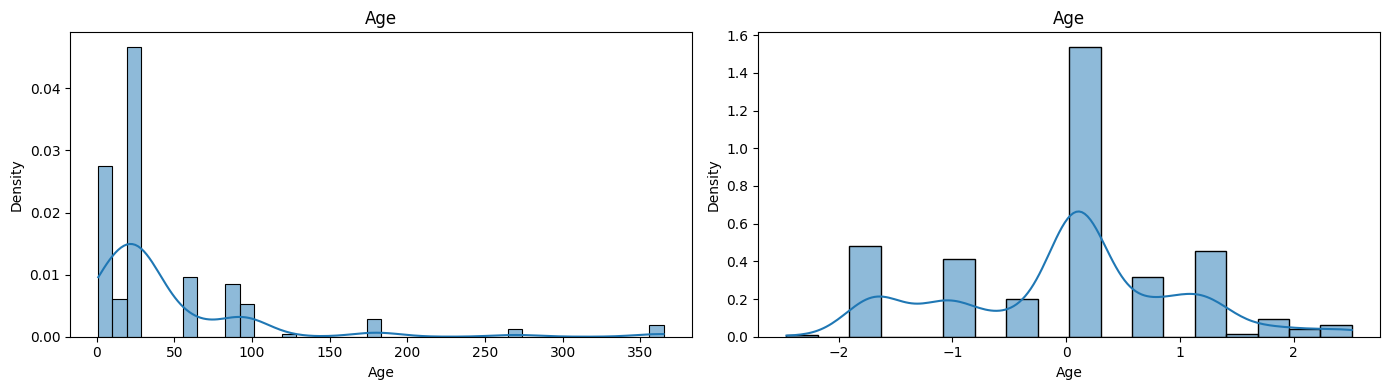

In [35]:
#Before and after comparision for Box-cox plot
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
    sns.histplot(X_train[col],kde=True, stat='density' ,ax=ax1)
    ax1.set_title(col)

    sns.histplot(X_train_transformed[col], kde=True, stat='density', ax=ax2)
    ax2.set_title(col)

    plt.tight_layout()
    plt.show()

In [34]:
X_train_transformed

array([[-1.27975148,  0.9561511 ,  1.12804495, ..., -0.26250008,
        -0.67756847,  0.1060097 ],
       [ 1.24470596,  0.70199413,  1.13757676, ..., -1.91272791,
        -0.3140622 ,  0.1060097 ],
       [ 0.07984236, -1.08566729,  1.13140696, ...,  1.01840672,
         0.02595744, -1.67597002],
       ...,
       [-0.84451727, -1.08566729,  1.13368097, ...,  1.34536665,
         0.29715694,  1.24673336],
       [ 1.5656235 ,  0.92549636, -0.88721185, ..., -1.5372548 ,
         0.0762111 ,  0.1060097 ],
       [ 0.42655631, -1.08566729,  1.12610617, ..., -0.62083414,
         0.0951082 ,  0.1060097 ]])

In [36]:
#Apply Yeo-johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2, y_train)

y_pred3 = lr.predict(X_test_transformed2)
print(r2_score(y_test, y_pred3))

pd.DataFrame({'cols':X_train.columns, 'Yeo_Johnson_lambdas': pt1.lambdas_})

0.8161906513339304


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [38]:
#Applying cross val score
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2, y, scoring='r2'))

np.float64(0.6834625134285748)

In [39]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

In [40]:
X_train_transformed2

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,1.018168,1.130993,-0.301917,1.250424,-0.262504,-0.677567,0.105778
1,1.244813,0.222584,1.166671,-0.165051,0.643937,-1.912717,-0.314063,0.105778
2,0.079751,-1.056928,1.143637,-1.047299,0.796163,1.018407,0.025954,-1.664976
3,-0.145770,0.835725,1.009268,0.581232,0.585508,-1.750770,0.583249,0.105778
4,-1.131111,0.487511,1.150162,-1.105305,0.886463,1.368579,0.262619,-1.664976
...,...,...,...,...,...,...,...,...
819,0.183530,1.146737,-0.884932,-1.769937,0.924953,0.390560,0.358772,-1.664976
820,-0.198870,-1.056928,1.151932,-1.839142,0.999192,1.445978,0.322793,-0.491262
821,-0.844661,-1.056928,1.152152,-0.706091,0.796163,1.345370,0.297153,1.257511
822,1.565741,0.921796,-0.884932,-0.019305,0.689050,-1.537249,0.076208,0.105778


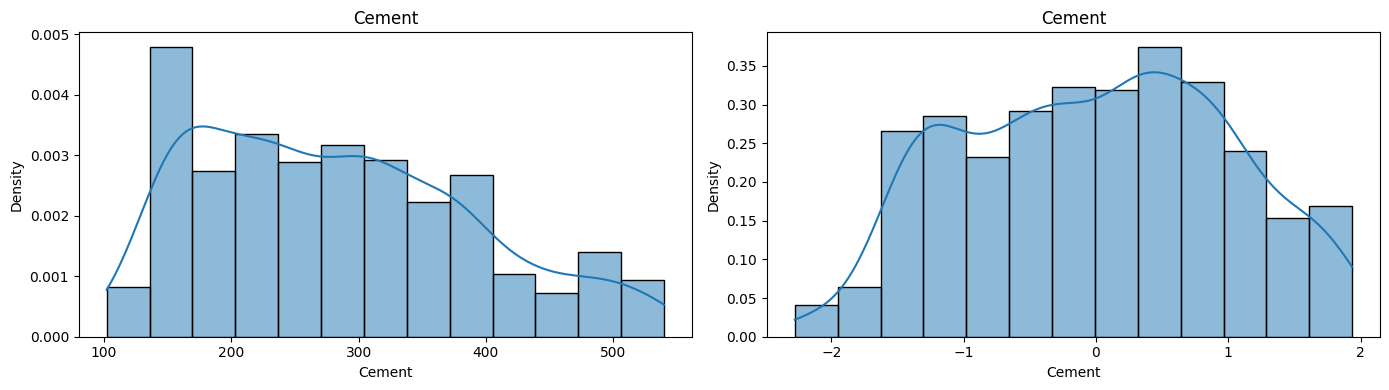

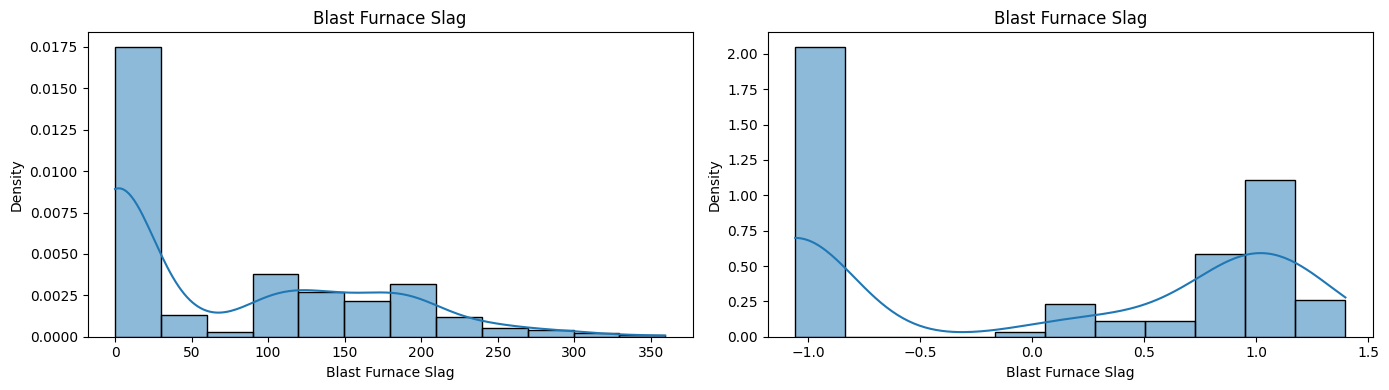

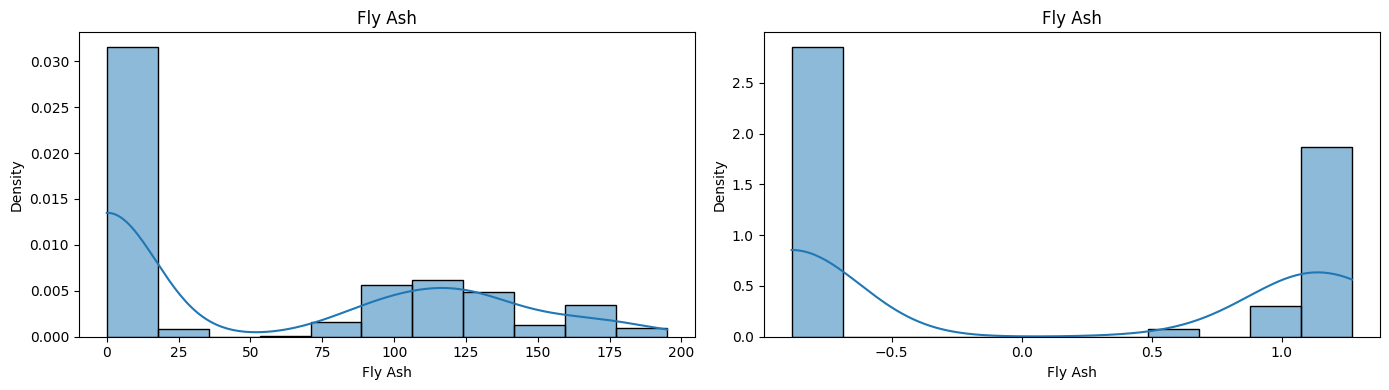

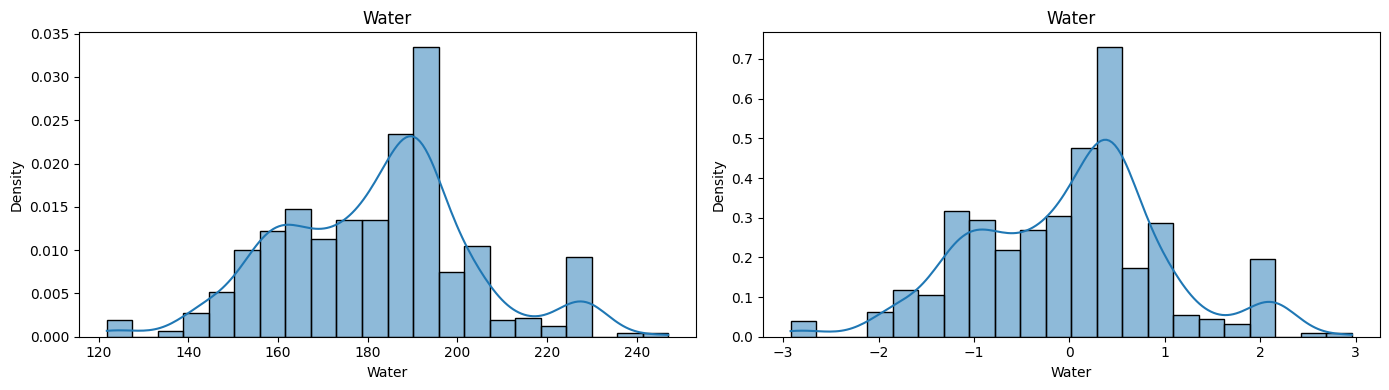

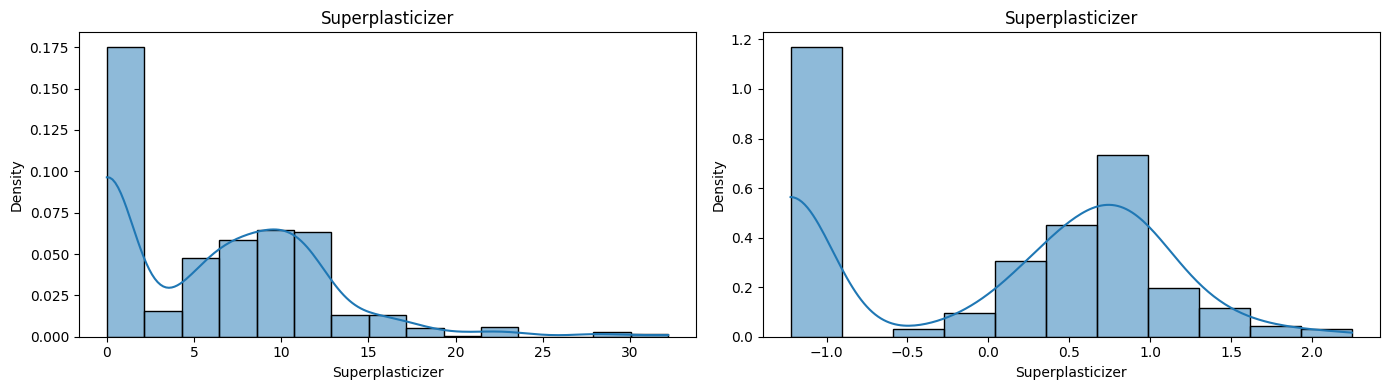

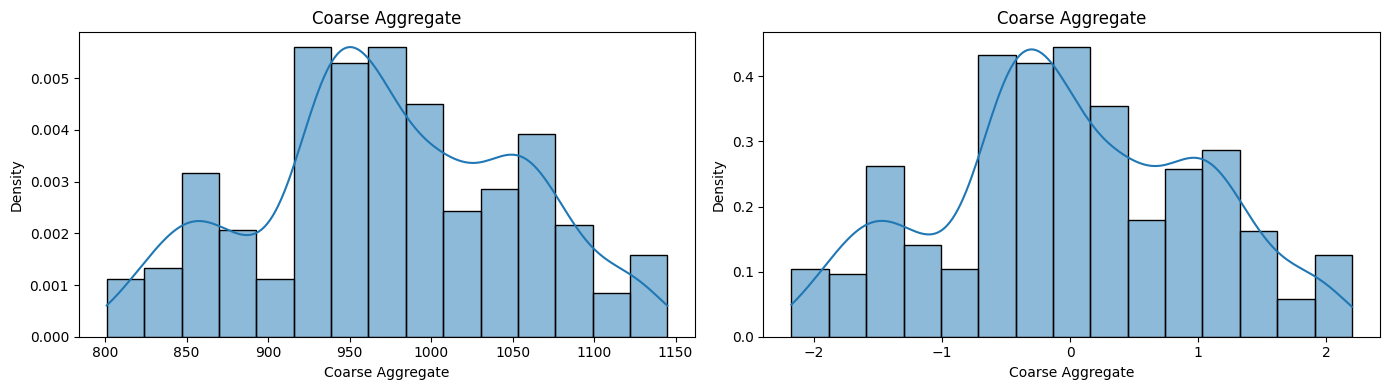

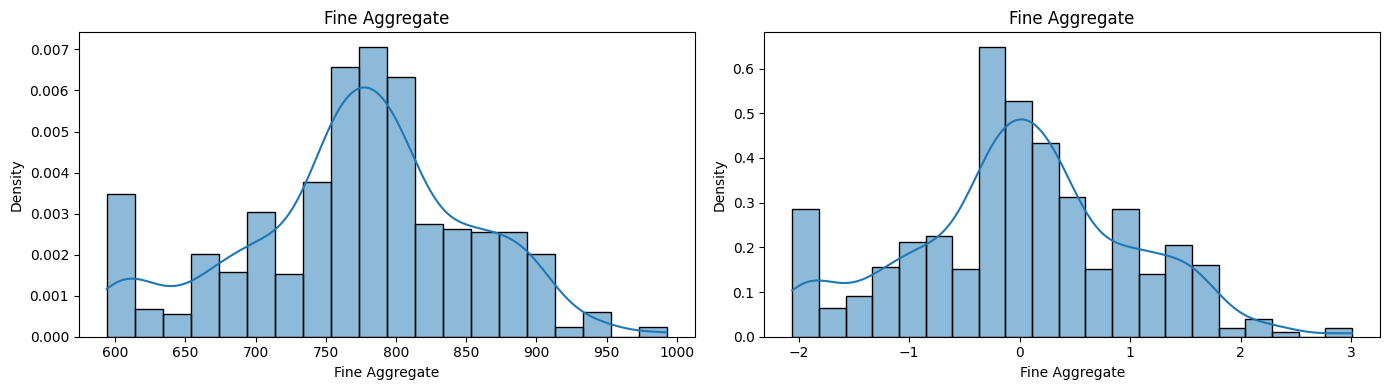

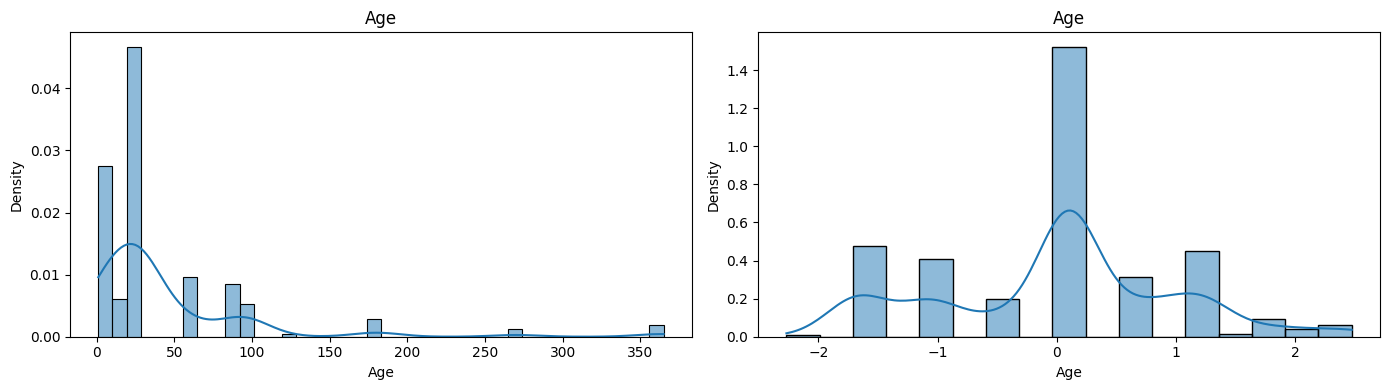

In [41]:
#Before and after comparision of Yeo johonson transformation

for col in X_train_transformed2.columns:
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))
    sns.histplot(X_train[col], kde=True, stat='density', ax=ax1)
    ax1.set_title(col)

    sns.histplot(X_train_transformed2[col], kde=True, stat='density', ax=ax2)
    ax2.set_title(col)

    plt.tight_layout()
    plt.show()

In [42]:
#Side by side lambdas
pd.DataFrame({'cols': X_train.columns, 'box-cox_lambdas': pt.lambdas_, 'Yeo_johnson_lambdas': pt1.lambdas_})

,cols,box-cox_lambdas,Yeo_johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885
